In [10]:
# importando modulos que se van a usar
import os, sys
import numpy as np
import pandas as pd
import pandas_profiling

# module to do statistics
import scipy.stats  as stats

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
import pandas_profiling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.tools.plotting import scatter_matrix
from statsmodels.graphics.regressionplots import influence_plot
import scipy.stats as stats# Funciones adicionales

In [11]:
# funcion de otra persona http://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame"
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [12]:
# Changing directory
pathArchivos = input("Escriba el PATH directorio / carpeta de su archivo de analisis")

Escriba el PATH directorio / carpeta de su archivo de analisisC:\Users\lc.mojica639\Documents\Cientificas de Datos\Bootcamp\


### Caso

Caso
Los ingenieros de control de costos están interesados en reducir la cantidad de agua utilizada en la planta de producción. 
El archivo Agua.xlsx contiene observaciones mensuales de las siguientes variables:

 Temperatura: Promedio mensual de temperatura en grados Fahrenheit.

 Produccion: Cantidad de producción en Millones de libras.

 Dias: Número de días al mes que la planta estuvo operando.

 Personas: Número de operadores en la nómina de la planta mensual.

 Agua: Uso de agua mensual en galones.



In [13]:
# Reading dataframe
df = pd.read_excel(pathArchivos +"Agua.xlsx")

In [14]:
df.shape

(17, 5)

In [15]:
df.dtypes

Temperatura    float64
Produccion       int64
Dias             int64
Personas         int64
Agua             int64
dtype: object

In [16]:
# Looking missing values by column
missing_values_table(df)

,Missing Values,% of Total Values
Temperatura,2,11.764706
Produccion,0,0.000000
Dias,0,0.000000
Personas,0,0.000000
Agua,0,0.000000


In [17]:
# Using pandas profiling
pandas_profiling.ProfileReport(df)

Number of variables,5
Number of observations,17
Total Missing (%),2.4%
Total size in memory,760.0 B
Average record size in memory,44.7 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## 1. Realice la depuración de datos que haga falta y exponga de manera detallada la manera en que realizó la corrección.

In [18]:
df.describe()

,Temperatura,Produccion,Dias,Personas,Agua
count,15.000000,17.000000,17.000000,17.000000,17.000000
mean,64.840000,12900.470588,22.000000,181.823529,3303.705882
std,14.442536,3526.786606,2.936835,21.994986,446.698411
min,39.500000,6373.000000,19.000000,129.000000,2828.000000
25%,55.250000,11964.000000,20.000000,175.000000,3022.000000
50%,70.900000,14119.000000,22.000000,190.000000,3125.000000
75%,78.150000,14575.000000,22.000000,195.000000,3502.000000
max,81.000000,18573.000000,32.000000,206.000000,4488.000000


## Cambio de filas con datos NAN, errados

In [19]:
# conociendo la fila con este valor
df[df.Dias==32]

,Temperatura,Produccion,Dias,Personas,Agua
5,81.0,14564,32,189,3898


In [20]:
df.set_value(5,'Dias',31)

C:\Users\lc.mojica639\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,Temperatura,Produccion,Dias,Personas,Agua
0,58.8,7107,21,129,3067
1,NaN,6373,22,141,2828
2,70.9,6796,22,153,2891
3,77.4,9208,20,166,2994
4,79.3,14792,25,193,3082
5,81.0,14564,31,189,3898
6,71.9,11964,20,175,3502
7,63.9,13526,23,186,3060
8,54.5,12656,20,190,3211
9,39.5,14119,20,187,3286


In [21]:
# Mirar datos faltantes
dataNullDf = df[pd.isnull(df).any(axis=1)]

In [22]:
dataNullDf

,Temperatura,Produccion,Dias,Personas,Agua
1,NaN,6373,22,141,2828
13,NaN,14575,22,192,2922


## Scatter plots

### Cual es la variable dependiente (endogena), cual es la variable independiente (exogena) ?

In [23]:
df.dtypes

Temperatura    float64
Produccion       int64
Dias             int64
Personas         int64
Agua             int64
dtype: object

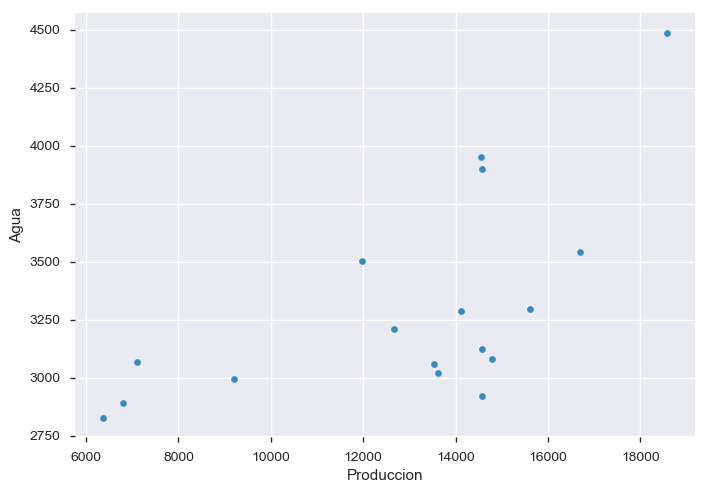

In [24]:
# Agua dado produccion
df.plot(x='Produccion',y='Agua',kind='scatter')

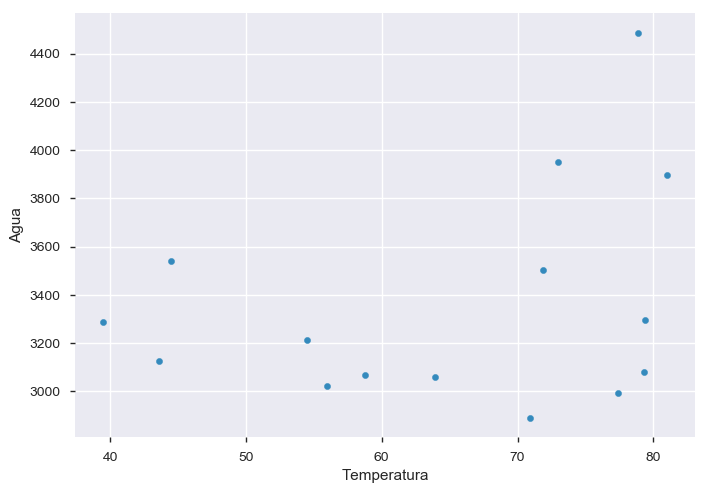

In [25]:
# Agua data temperatura
df.plot(x='Temperatura',y='Agua',kind='scatter')

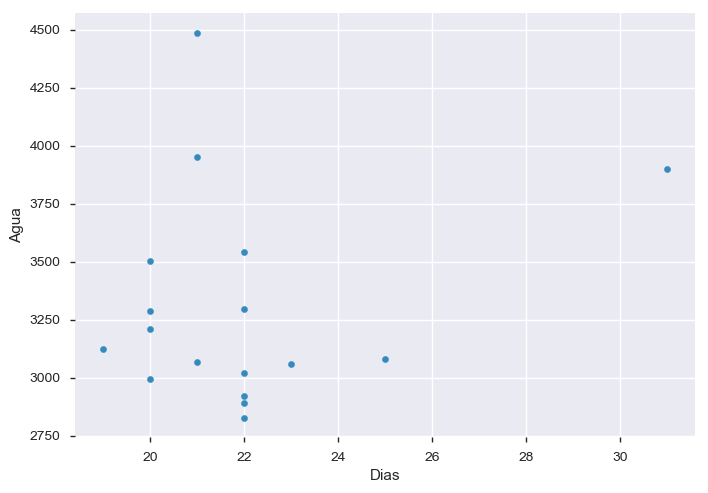

In [26]:
# Agua dado Dias
df.plot(x='Dias',y='Agua',kind='scatter')

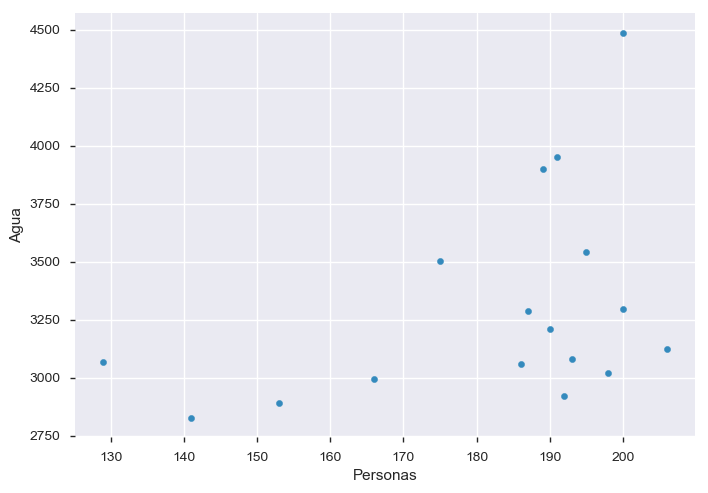

In [27]:
# Agua dado Personas
df.plot(x='Personas',y='Agua',kind='scatter')

## Regresion con variable dependiente Agua y los otras variables independientes

In [28]:
Regresion = ols(formula="Agua ~ Temperatura+Produccion+Dias+Personas", data=df).fit()

In [29]:
Regresion.params

Intercept      4041.129832
Temperatura       9.229256
Produccion        0.199320
Dias            -12.993125
Personas        -19.739891
dtype: float64

### Tiene sentido que haya intercepto ?

In [30]:
Regresion.summary()

C:\Users\lc.mojica639\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Agua   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     5.327
Date:                Fri, 08 Mar 2019   Prob (F-statistic):             0.0146
Time:                        20:24:29   Log-Likelihood:                -103.68
No. Observations:                  15   AIC:                             217.4
Df Residuals:                      10   BIC:                             220.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4041.1298   1236.491      3.268      0.008    1286.055    6796.205
Temperatura     9.2293      6.254      1.476      0.171      -4.705      23.164
Produccion      0.1993      0.055      3.642      0.005       0.077       0.321
Dias          -12.9931     31.316     -0.415      0.687     -82.769      56.783
Personas      -19.7399      8.734     -2.260      0.047     -39.200      -0.280
==============================================================================
Omnibus:                        0.669   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.610
Skew:                          -0.407   Prob(JB):                        0.737
Kurtosis:                       2.440   Cond. No.                     2.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Cual es la ecuacion de la recta?

### Agua = 4600.81 + 9.2293*Temperatura+0.1993*Produccion -12.9931*Dias -19.7399*Personas

## Interpretation of R2 y adjusted R2

Link1: http://www.statisticshowto.com/adjusted-r2/

Link2: https://www.youtube.com/watch?v=KjRrdb2x6dA


## Prueba de Jarque-Bera (Test de Normalidad sin usar mean y sd)

Link: http://www.statisticshowto.com/jarque-bera-test/

<hr>

## Estudio de Residuos

#### ¿Los residuos tienen distribución normal?

In [31]:
# Obteniendo fitted values
Yest=Regresion.fittedvalues;
# Obteniendo residuos
Residuos=Regresion.resid;

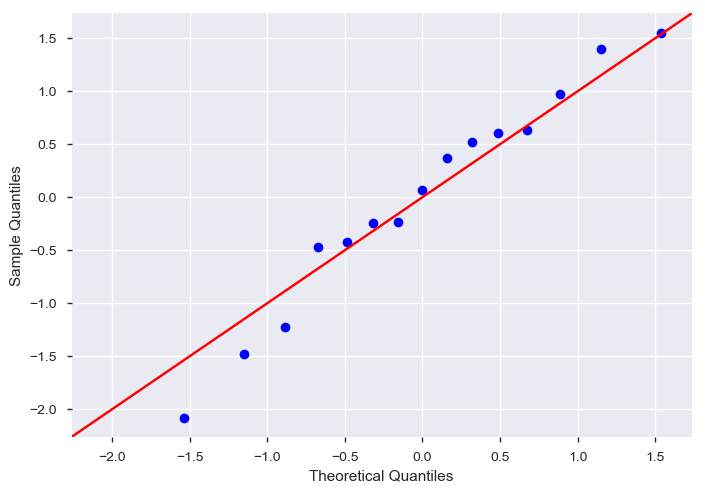

In [32]:
fig_de_punto_7 = sm.qqplot(Residuos, stats.t, fit=True, line='45')

## Graficas relacionados a la regresion

In [33]:
# Haciendo nuevo dataframe
df1=pd.DataFrame({'y':df.Agua,'yest':Regresion.fittedvalues, 'Residuos':Regresion.resid})

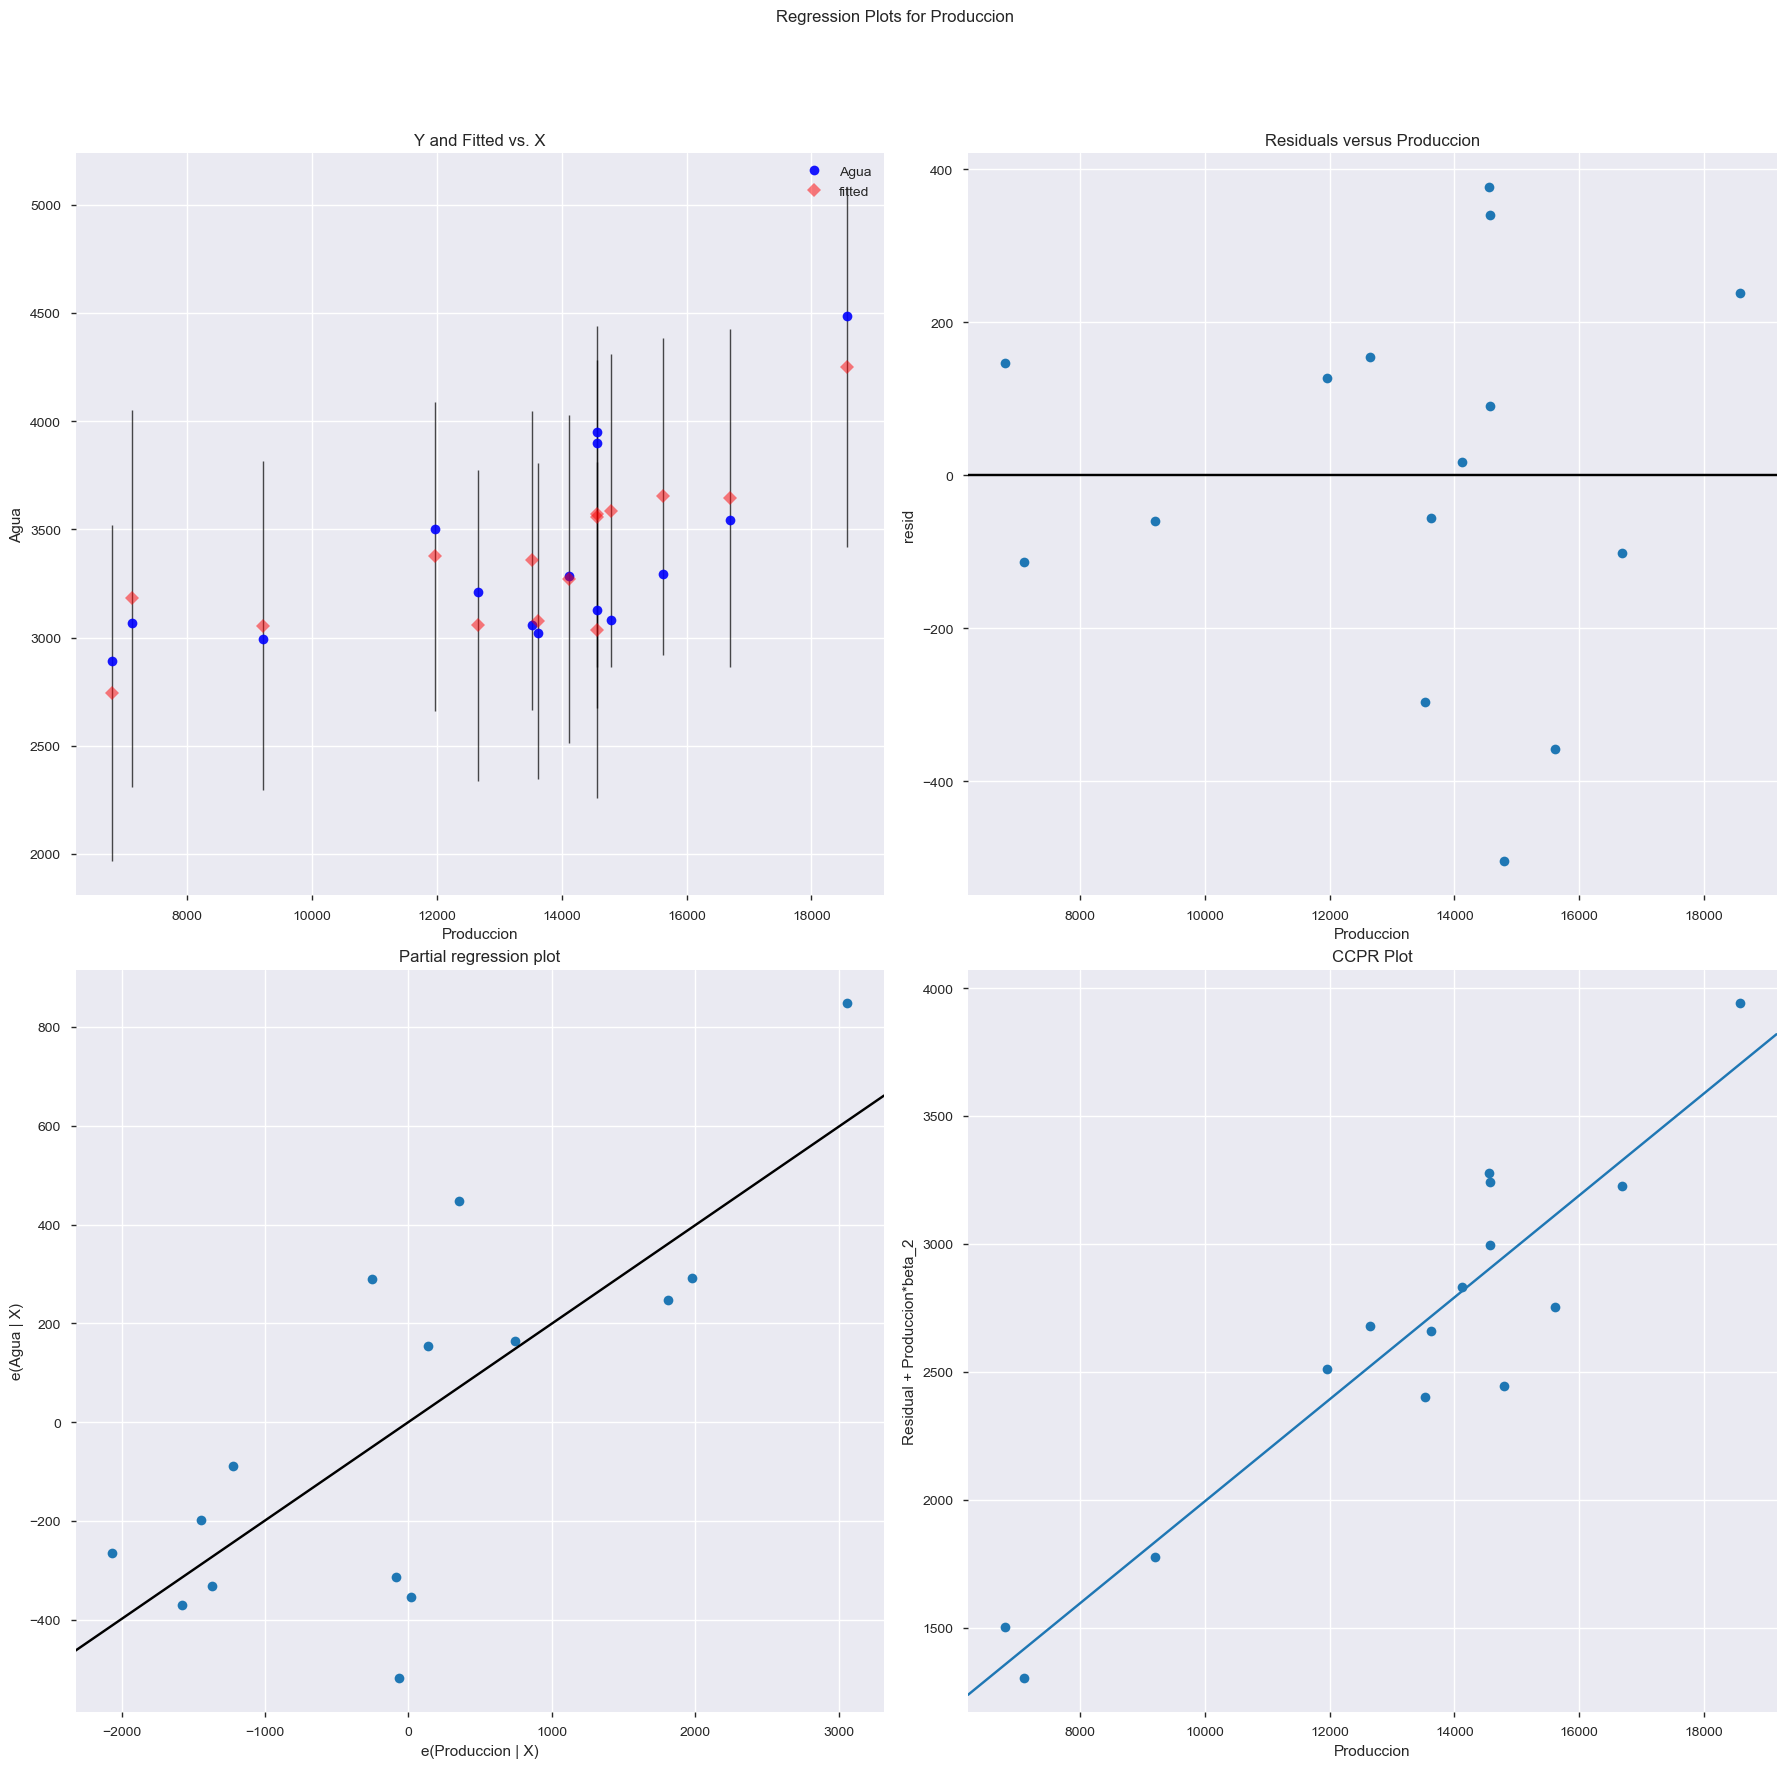

In [34]:
# Resultados para Produccion
fig = plt.figure(figsize=(18,18))
fig = sm.graphics.plot_regress_exog(Regresion,exog_idx='Produccion',fig=fig)

## Estudio de Residuals

In [35]:
# Haciendo nuevo dataframe
df1=pd.DataFrame({'y':df.Agua,'yest':Regresion.fittedvalues, 'Residuos':Regresion.resid})

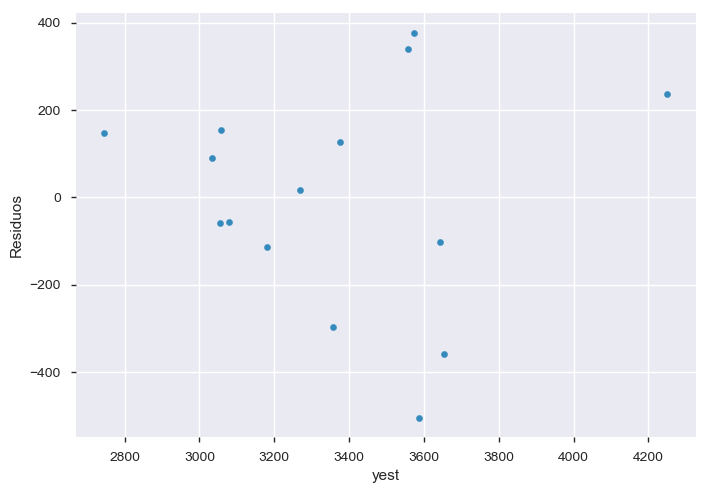

In [36]:
df1.plot(x='yest',y='Residuos',kind='scatter')

## Leer los siguientes links:

Link1: https://stats.stackexchange.com/questions/76226/interpreting-the-residuals-vs-fitted-values-plot-for-verifying-the-assumptions

Link2: https://www.youtube.com/watch?v=_NkWG1M69CI

### Histograma de Residuos

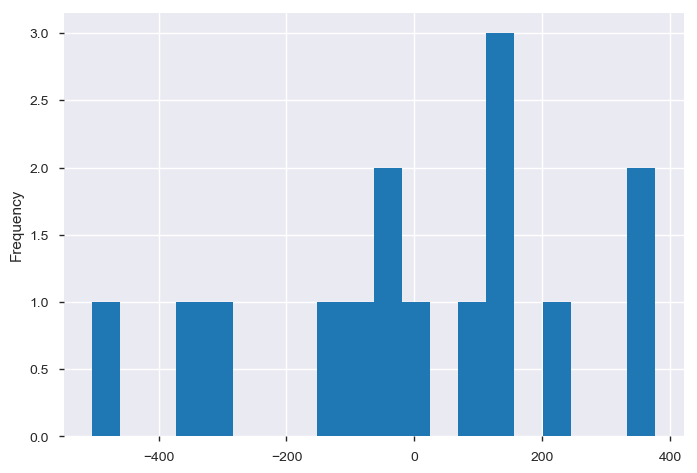

In [37]:
df1.Residuos.plot(kind='hist',bins=20)

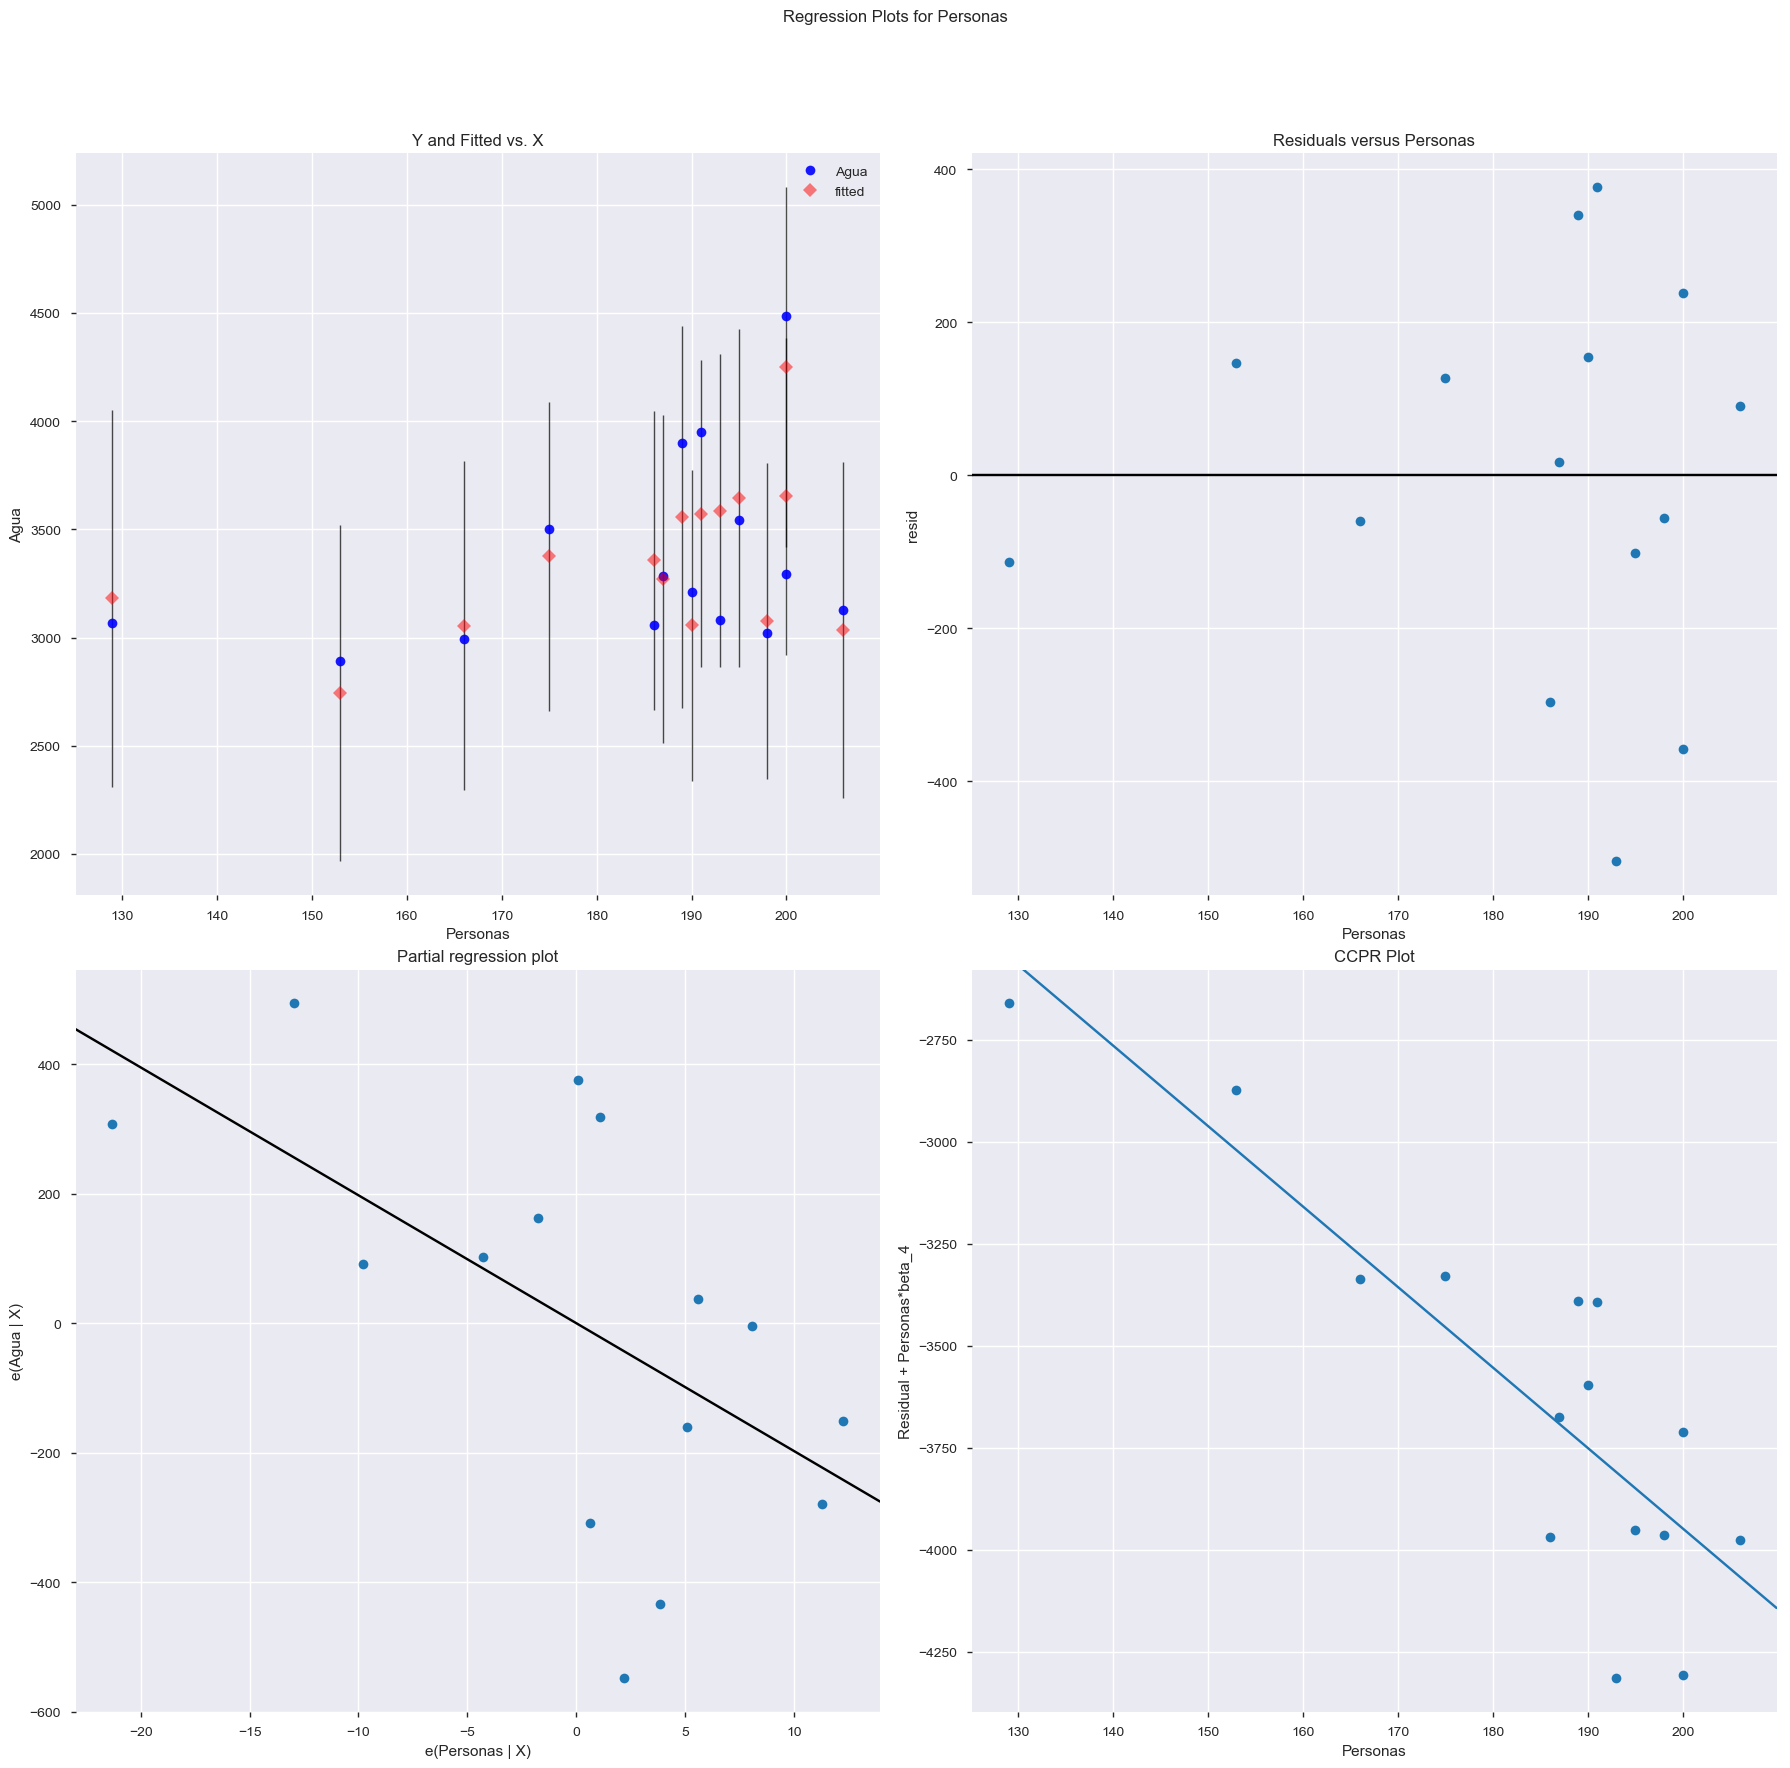

In [38]:
# Resultados para Produccion
fig = plt.figure(figsize=(18,18))
fig = sm.graphics.plot_regress_exog(Regresion,exog_idx='Personas',fig=fig)

## Influence plot

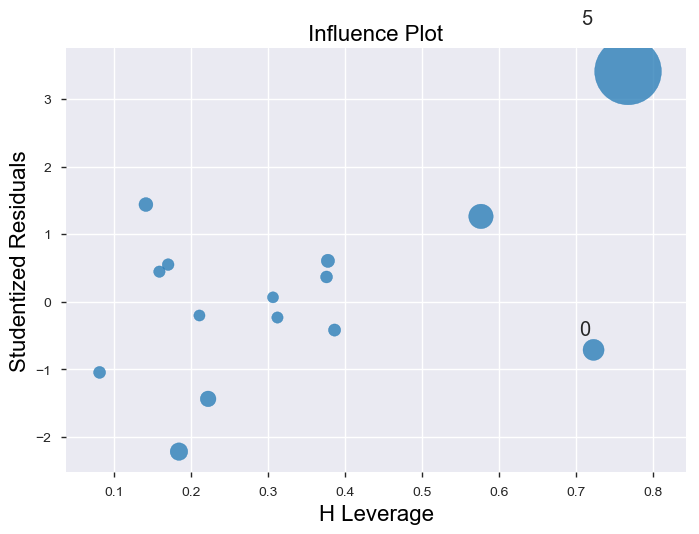

In [39]:
inf =sm.graphics.influence_plot(Regresion)

#### Que cree que esta pasando con estos valores ?

In [40]:
df.loc[[0,15],]

,Temperatura,Produccion,Dias,Personas,Agua
0,58.8,7107,21,129,3067
15,78.9,18573,21,200,4488
